This notebook is a tutorial to show how to manage the preprocessed data for sleep stage classification

In [2]:
import numpy as np 
import gzip as gz 
from tqdm.notebook import tqdm
import torch as th 
import pickle

In [3]:
datad="5-cassette"

In [4]:
datad

'5-cassette'

In [5]:
fp = gz.open(datad+'/SC4671G0.npz.gz','rb')
data = np.load(fp,allow_pickle=True) 


In [6]:
# To see what it contains 
data.files

['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']

In [7]:
data['header_raw']

array({'local_subject_id': 'X F X Female_87yr', 'local_recording_id': 'Startdate 07-AUG-1991 X X X', 'date_time': '2091-08-07 16:00:00', 'EDF+': False, 'contiguous': True, 'n_records': 2780, 'record_length': 30.0, 'n_channels': 7, 'label': ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker'], 'transducer_type': ['Ag-AgCl electrodes', 'Ag-AgCl electrodes', 'Ag-AgCl electrodes', 'Oral-nasal thermistors', 'Ag-AgCl electrodes', 'Rectal thermistor', 'Marker button'], 'units': ['uV', 'uV', 'uV', '', 'uV', '', ''], 'physical_min': array([ -207.,  -179., -1055., -2048.,    -5.,     0., -2047.]), 'physical_max': array([ 207.,  179., 1055., 2047.,    5.,   30., 2048.]), 'digital_min': array([ -2048.,  -2048.,  -2048.,  -2048.,  -2500., -32768.,  -2047.]), 'digital_max': array([ 2047.,  2047.,  2047.,  2047.,  2500., 32767.,  2048.]), 'prefiltering': ['HP:0.5Hz LP:100Hz [enhanced cassette BW]', 'HP:0.5Hz LP:100Hz [enhanced cassette BW]', 

In [51]:
# The data are stored in 'x' and 'y'
x = data['x']
y = data['y']

In [52]:
print(x.shape, y.shape)

(1968, 600, 4) (1968,)


In [53]:
# The header is the copy of the original one 
data["header_raw"]


array({'local_subject_id': 'X F X Female_87yr', 'local_recording_id': 'Startdate 07-AUG-1991 X X X', 'date_time': '2091-08-07 16:00:00', 'EDF+': False, 'contiguous': True, 'n_records': 2780, 'record_length': 30.0, 'n_channels': 7, 'label': ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker'], 'transducer_type': ['Ag-AgCl electrodes', 'Ag-AgCl electrodes', 'Ag-AgCl electrodes', 'Oral-nasal thermistors', 'Ag-AgCl electrodes', 'Rectal thermistor', 'Marker button'], 'units': ['uV', 'uV', 'uV', '', 'uV', '', ''], 'physical_min': array([ -207.,  -179., -1055., -2048.,    -5.,     0., -2047.]), 'physical_max': array([ 207.,  179., 1055., 2047.,    5.,   30., 2048.]), 'digital_min': array([ -2048.,  -2048.,  -2048.,  -2048.,  -2500., -32768.,  -2047.]), 'digital_max': array([ 2047.,  2047.,  2047.,  2047.,  2500., 32767.,  2048.]), 'prefiltering': ['HP:0.5Hz LP:100Hz [enhanced cassette BW]', 'HP:0.5Hz LP:100Hz [enhanced cassette BW]', 

In [21]:
# The four channels in x are 'EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental'
# You can take more if you modify the preparation script and rerun it. 
# To get a list all the files:
import os 
import glob
fnames = glob.glob(os.path.join(datad, "*npz.gz"))
print(fnames[:10]) # print the first 10

['5-cassette\\SC4001E0.npz.gz', '5-cassette\\SC4002E0.npz.gz', '5-cassette\\SC4011E0.npz.gz', '5-cassette\\SC4012E0.npz.gz', '5-cassette\\SC4021E0.npz.gz', '5-cassette\\SC4022E0.npz.gz', '5-cassette\\SC4031E0.npz.gz', '5-cassette\\SC4032E0.npz.gz', '5-cassette\\SC4041E0.npz.gz', '5-cassette\\SC4042E0.npz.gz']


In [25]:
fnames.remove('5-cassette\\SC4001E0.npz.gz')

In [36]:
np.shape(fnames)

(152,)

In [27]:
from tqdm import tqdm

In [37]:
fp = gz.open(fn,'rb')
data = np.load(fp,allow_pickle=True) # for now, don't care about headers
x = data['x'][:,:,2] # Take only the EOG
y = data['y'] # Take the labels 
# data['x'][:,:,0] ca c'est le EEG Fpz-Cz
# data['x'][:,:,1] ca c'est le EEG Pz-Oz


In [38]:
data['ch_label']

array(['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental'],
      dtype='<U14')

In [39]:
print(data.files)

['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']


In [40]:
data['header_annotation']

array({'local_subject_id': 'X F X Female_56yr', 'local_recording_id': 'Startdate 26-SEP-1991 X X X', 'date_time': '2091-09-26 15:00:00', 'EDF+': True, 'contiguous': True, 'n_records': 1, 'record_length': 0.0, 'n_channels': 1, 'label': ['EDF Annotations'], 'transducer_type': [''], 'units': [''], 'physical_min': array([0.]), 'physical_max': array([1.]), 'digital_min': array([-32768.]), 'digital_max': array([32767.]), 'prefiltering': [''], 'n_samples_per_record': [2220]},
      dtype=object)

In [41]:
devpart = 10
xtrain , xvalid = None , None 
ytrain , yvalid = None , None 
# If you take all the data you dhould end with 
# 
for fn in tqdm(fnames): 
    fp = gz.open(fn,'rb')
    data = np.load(fp,allow_pickle=False) # for now, don't care about headers
    x = data['x'][:,:,2] # Take only the EOG
    y = data['y'] # Take the labels 
    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    devlim = x.shape[0]//devpart
    devpart = 10
    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    devlim = x.shape[0]//devpart
    if xtrain is None: 
        xtrain = np.zeros((1,x.shape[1]))
        xvalid = np.zeros((1,x.shape[1]))
        ytrain , yvalid = np.zeros(1) , np.zeros(1)
    xvalid = np.concatenate((xvalid,x[idx[:devlim]]), axis=0)
    yvalid = np.concatenate((yvalid,y[idx[:devlim]]), axis=0)
    xtrain = np.concatenate((xtrain,x[idx[devlim:]]), axis=0)
    ytrain = np.concatenate((ytrain,y[idx[devlim:]]), axis=0)
    del x,y

100%|██████████| 152/152 [01:03<00:00,  2.38it/s]


In [42]:
print(xtrain.shape, xvalid.shape)
print(ytrain.shape, yvalid.shape)


(175239, 600) (19401, 600)
(175239,) (19401,)


In [22]:
print(xtrain.shape, xvalid.shape)
print(ytrain.shape, yvalid.shape)


(175996, 600) (19485, 600)
(175996,) (19485,)


In [43]:
# clean the first dummy example 
xtrain , xvalid = xtrain[1:] , xvalid[1:] 
ytrain , yvalid = ytrain[1:] , yvalid[1:] 
print(xtrain.shape, xvalid.shape)
print(ytrain.shape, yvalid.shape)


(175238, 600) (19400, 600)
(175238,) (19400,)


In [44]:
# In Torch version 
xtrain, xvalid = th.FloatTensor(xtrain), th.FloatTensor(xvalid)
ytrain, yvalid = th.IntTensor(ytrain), th.IntTensor(yvalid)

In [45]:
outf="./cassette-th-data_rem.pck"
fp = open(outf,"wb")
pickle.dump((xtrain , xvalid , ytrain , yvalid), fp)

In [46]:
import matplotlib.pyplot as plt


tensor(3, dtype=torch.int32)


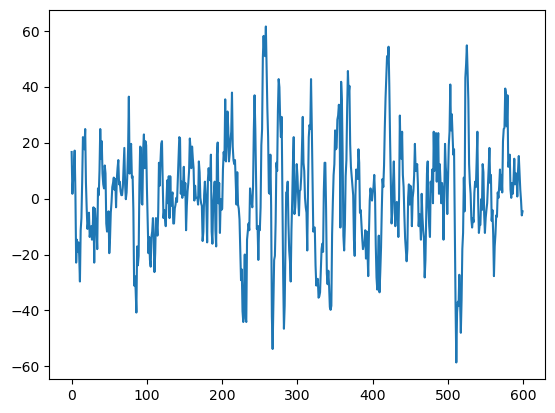

In [47]:
plt.plot(xtrain[2])
print(ytrain[2])

In [48]:
ytrain[:200]

tensor([0, 4, 3, 2, 3, 4, 3, 3, 4, 3, 3, 4, 2, 4, 3, 0, 4, 2, 4, 2, 2, 0, 3, 2,
        3, 2, 0, 3, 4, 4, 3, 2, 2, 3, 1, 0, 4, 4, 4, 3, 2, 2, 3, 3, 4, 2, 4, 2,
        3, 2, 4, 2, 4, 3, 3, 3, 4, 2, 4, 0, 4, 4, 0, 2, 2, 3, 2, 2, 3, 4, 2, 0,
        2, 4, 0, 4, 2, 4, 4, 3, 2, 0, 3, 2, 2, 4, 3, 3, 3, 2, 2, 4, 2, 2, 4, 3,
        2, 4, 4, 4, 2, 4, 2, 0, 4, 3, 2, 2, 3, 4, 2, 0, 0, 4, 2, 2, 2, 4, 2, 3,
        2, 4, 3, 2, 3, 2, 3, 0, 2, 3, 4, 0, 1, 0, 1, 3, 3, 3, 3, 3, 0, 3, 2, 3,
        3, 3, 0, 4, 4, 3, 3, 2, 0, 4, 4, 3, 2, 3, 4, 3, 2, 0, 2, 3, 1, 0, 3, 1,
        3, 2, 0, 2, 3, 0, 2, 4, 2, 3, 2, 2, 0, 2, 1, 0, 2, 3, 2, 0, 2, 0, 3, 4,
        4, 2, 4, 1, 2, 4, 2, 0], dtype=torch.int32)

In [27]:
!ls -lh ./cassette-th-data.pck

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
